<a href="https://colab.research.google.com/github/yongbin02/AI/blob/main/9%EC%A3%BC%EC%B0%A8/Alco_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [13]:
# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI/data/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [14]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [15]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

In [16]:
# 테스트 데이터셋 분리 -> 80%는 훈련, 20%는 테스트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [17]:
# 4. RNN 모델
model_rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

model_rnn.compile(optimizer='adam', loss='mse')

history_rnn = model_rnn.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=8,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0703
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010    
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0018
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0026
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0010
Epoch 16/50
32/32 ━━━━━

In [18]:
# 5. LSTM 모델
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

history_lstm = model_lstm.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=8,
    verbose=1
)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0526
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048
Epoch 16/50
32/32 ━

In [19]:
# 6. MSE 계산 및 모델 평가

# RNN MSE 계산
y_pred_rnn_scaled = model_rnn.predict(X_test)
mse_rnn_scaled = mean_squared_error(y_test, y_pred_rnn_scaled)
print(f"RNN Test MSE (Scaled Data): {mse_rnn_scaled}")

# LSTM MSE 계산
y_pred_lstm_scaled = model_lstm.predict(X_test)
mse_lstm_scaled = mean_squared_error(y_test, y_pred_lstm_scaled)
print(f"LSTM Test MSE (Scaled Data): {mse_lstm_scaled}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 385ms/step
RNN Test MSE (Scaled Data): 0.00784966427025331
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
LSTM Test MSE (Scaled Data): 0.012646982213282885


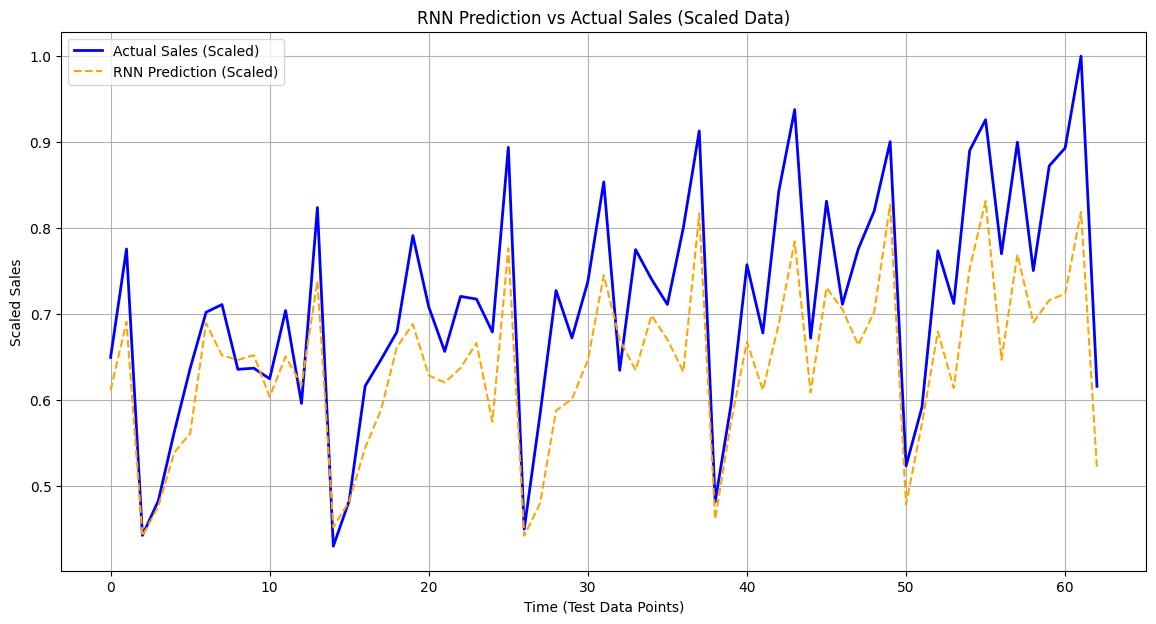

In [22]:
# 7. 그래프 그리기

# 그래프 1: RNN vs Actual
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Sales (Scaled)', color='blue', linewidth=2)
plt.plot(y_pred_rnn_scaled, label='RNN Prediction (Scaled)', color='orange', linestyle='--')
plt.title('RNN Prediction vs Actual Sales (Scaled Data)')
plt.xlabel('Time (Test Data Points)')
plt.ylabel('Scaled Sales')
plt.legend()
plt.grid(True)
plt.show()

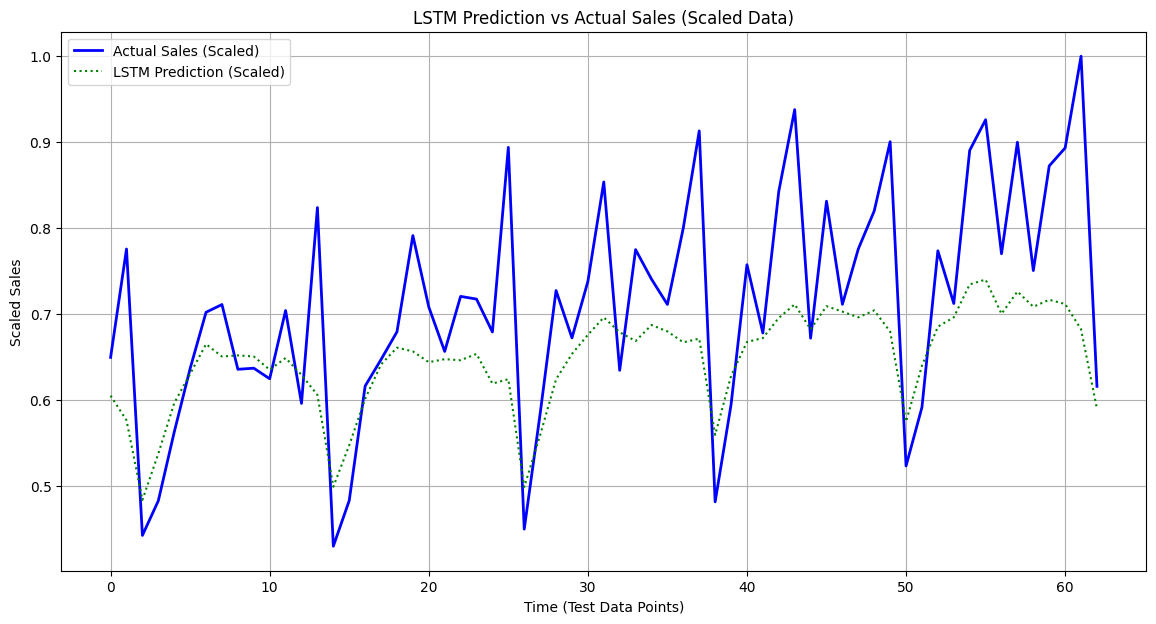

In [23]:
# 그래프 2: LSTM vs Actual
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Sales (Scaled)', color='blue', linewidth=2)
plt.plot(y_pred_lstm_scaled, label='LSTM Prediction (Scaled)', color='green', linestyle=':')
plt.title('LSTM Prediction vs Actual Sales (Scaled Data)')
plt.xlabel('Time (Test Data Points)')
plt.ylabel('Scaled Sales')
plt.legend()
plt.grid(True)
plt.show()